# Key Take-aways

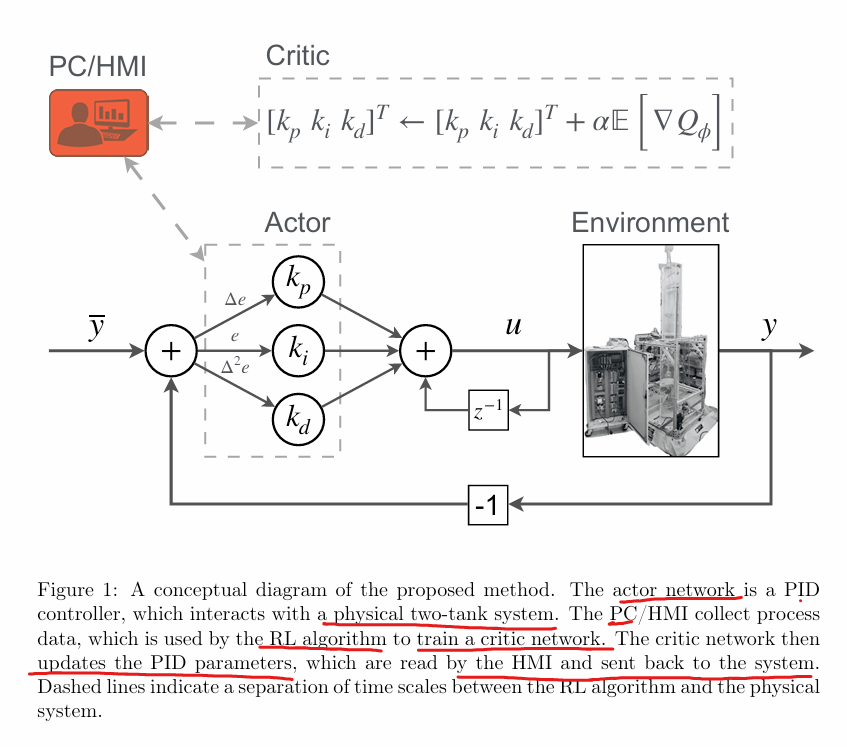

**Scoring system for RL algorithms in process control**

1. _Nominal performance_: How much does the RL agent improve the performance of the closed-loop system compared to its initialization?
2. _Stability_: Is the trained closed-loop system stable? Did it become unstable during training?
3. _Perturbation to the system_: How much perturbation to the process is required to achieve satisfactory performance?
4. _Initialization_: To what extent does the performance of the RL agent depend on the initial PID parameters?
5. _Hyperparameters_: Do the algorithm hyperparameters need to be adjusted between experiments? Which hyperparameters influence the learning process most strongly?
6. _Training duration_: How many episodes are required to achieve satisfactory performance?
7. _Practicality and specialization_: What hardware is required in order to deploy the RL algorithm on the physical process? What level of user expertise is required in order to implement the algorithm?

Integral absolute error:
$$IAE: \int_0^\infty |e(t)|dt$$

Integral squared error:
$$ISE: \int_0^\infty e(t)^2dt$$

Total Variation (TV):
$$TV: \sum_{t=0}^\infty |y(t+1)-y(t)|$$

Overshoot (OS):
$$OS = \max_{0 \leq t < \infty} \left\{ |e(t)| \mathbb{1}_{\left\{ t: e(0) \cdot e(t) < 0 \right\}} (t) \right\}$$

Settling Time (ST):
$$ST = \min_{0 \leq t <\infty} t \mathbb{1}_\left\{t: \space |e(\tau)| \leq \epsilon \forall \tau \geq t \right\} (t)$$

**Experiments for learning**
Measured data are stored, processed, then used to train the RL agent during operations. The RL agent generates new PID parameters, which then loaded into the HMI to update the Matlab PID control implementations. The outputs from these PID controllesr are sent to the process and logic controller which passes them to the appropriate field devices. This process of sending new data to the RL agent and updating the PID parameters can be done during an experiment or set to occur at the end. 

**Reward function selection**
Consider costs (negative rewards) that depend only on the tracking error $e_t$ and the change in control variable $\Delta u_t = u_t - u_{t-1}$  in the form:
$$l(s_t, u_t) = |e_t|^p + \lambda |\Delta u_t|^q$$

The reward function structure is flexible in terms of the range of behaviors it can incentivize. The squared error places a significant amount of weight on states with large errors; in comparison, the absolute error puts more emphasis on small errors. Therefore, it is reasonable to prefer the absolute error for a slower response but with better atetnuation of overshoot and oscillations. Conversely, a fast response may be desirable. 

**Tuning subject to input constraints**
The actor update scheme is modified to steer its actions to within a pre-defined range $[u_{min}, u_{max}]$
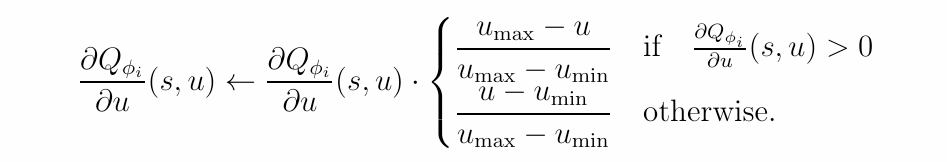

Another option for updating the actor parameters subject to constraints is to use an output activation on the actor such that the actions are automatically forced inside the range. 
* Using saturation function
* or a smooth approximation such as tanh

However, this approach diminishes the gradient at constraints, essentially ignoring the value of such state-action pairs. 